In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import matplotlib as plt

import pyfolio as pf
from pandas_datareader import data

# Options we may want:
Liquid/financial investments:
    1. Equities
    2. Fixed Income
    3. 

Wealth:
    1. Real Estate
    2. Pension (?)
    3. 401k
    4. Inheritance
    5. Other
    
Income:
    1. Your own
    2. Your partner's
    
Costs:
    1. Mortgage
    2. Kid's College
    3. Healthcare
    4. Retirement
    5. Student Debt
    6. etc

In [6]:
stock_rets = pf.utils.get_symbol_rets('^TNX')

RemoteDataError: Unable to read URL: http://ichart.finance.yahoo.com/table.csv?a=0&ignore=.csv&s=%5ETNX&b=1&e=26&d=4&g=d&f=2017&c=1970

In [ ]:
# MVP Plan:
Portfolio inputs:
    1. Equities (SPY)
    2. US 10Y Treaury (^TNX)
    3. NYC apartment

Parameters:
    1. When purchased
    2. Original cost
    3. Today

Historical Rates of Return:
    1. Mean
    2. Variance
    
Historical Covariance:
    TO DO
     
Time Horizon:
    

In [ ]:
def define_port(tickers_dict):
    """
    Feed dictionary of form {ticker: {'purchase_date': ,  'quantity': }}
    """
    

In [1]:
def get_hist_perf(tickers, start=None, end=None):
    hist_perf = {k: {} for k in tickers}
    for ticker in tickers:
        hist_perf[ticker] = pf.utils.get_symbol_rets(ticker, start=start, end=end)
    
    return hist_perf

def get_distr_params(ticker, hist_perf):
    """
    Simple mean return and vol for now, but can become Bayesian and/or capture more moments of returns dist
    """
    params = {}
    params['mean'] = hist_perf[ticker].mean()
    params['std'] = hist_perf[ticker].std()
    
    return params

def is_business_day(date):
    return bool(len(pd.bdate_range(date, date)))

def most_recent_business_day(date):
    return date if is_business_day(date) else date - pd.tseries.offsets.BDay(1)

def get_price(ticker, date, price_type='Close', source='yahoo'):
    date = most_recent_business_day(date) # TO DO:  Add ability to choose last or next biz day
    price = data.DataReader(ticker, source, start=date, end=date).loc[date, price_type]
    return price

def date_diff(start_date, end_date, freq='bdays'):
    if freq == 'days':
        time_delta = end_date - start_date
        diff = getattr(time_delta, freq)
    elif freq == 'bdays':
        diff = len(pd.bdate_range(start_date, end_date))
    else:
        raise ValueError('Weird freq')
    return diff

def simulate_price_path(original_price, params, start_date=None, end_date=datetime.date.today(), periods=None):
    periods = date_diff(start_date, end_date, freq='bdays') if not periods else periods
    return_path = np.random.lognormal(mean=params['mean'], sigma=params['std'], size=periods) #TO DO: accomodate other dists
    price_path = original_price * pd.Series(return_path).cumprod()
    return price_path

# def get_actual_price_path(ticker, original_price,)

NameError: name 'datetime' is not defined

In [2]:
portfolio = {
    'SPY': {
        'purchase_date': datetime.date(2005, 1, 30),
        'quantity': 100
    },
    '^TNX': {
        'purchase_date': datetime.date(2007, 3, 30),
        'quantity': 1000
    }
}

NameError: name 'datetime' is not defined

In [108]:
hist_perf = get_hist_perf(portfolio.keys())

In [331]:
hist_perf.keys()

['^TNX', 'SPY']

In [113]:
for ticker in portfolio:
    portfolio[ticker]['hist_distr_params'] = get_distr_params(ticker, hist_perf)
    portfolio[ticker]['price_at_purchase'] = get_price(ticker, portfolio[ticker]['purchase_date'])

In [168]:
portfolio

{'SPY': {'hist_distr_params': {'mean': 0.00041945019325987574,
   'std': 0.011721752079384732},
  'price_at_purchase': 117.43000000000001,
  'purchase_date': datetime.date(2005, 1, 30),
  'quantity': 100},
 '^TNX': {'hist_distr_params': {'mean': -8.538739739919333e-06,
   'std': 0.013565743765365379},
  'price_at_purchase': 4.6479999999999997,
  'purchase_date': datetime.date(2007, 3, 30),
  'quantity': 1000}}

In [ ]:
def simulate_position(position, start_date, end_date):
    
    return simulated

In [ ]:
start_date = position['purchase_date'] 
end_date = datetime.date.today()
date_range = pd.bdate_range(start=start_date , end=end_date, tz='UTC')


df = pd.DataFrame(index=date_range)
for x in range(100):
    price_path = simulate_price_path(position['price_at_purchase'], 
                                     position['hist_distr_params'], 
                                     start_date=start_date)
    price_path.index = date_range
    df['sim_' + str(x)] = price_path


In [327]:
position = portfolio['^TNX']

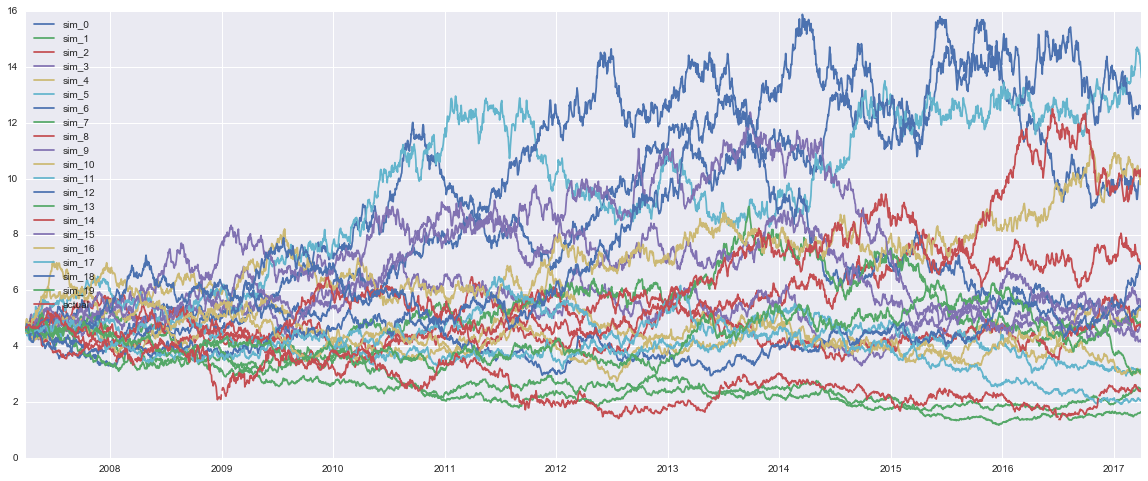

In [328]:
start_date = position['purchase_date'] 
end_date = datetime.date.today()
date_range = pd.bdate_range(start=start_date , end=end_date, tz='UTC')


df = pd.DataFrame(index=date_range)
for x in range(20):
    price_path = simulate_price_path(position['price_at_purchase'], 
                                     position['hist_distr_params'], 
                                     start_date=start_date)
    price_path.index = date_range
    df['sim_' + str(x)] = price_path
df = df.merge(pd.DataFrame(hist_perf['^TNX']), how='left', left_index=True, right_index=True)
df['actual'] = position['price_at_purchase'] * (1 + df['^TNX']).cumprod()

df.drop('^TNX', axis=1).plot(figsize=(20, 8))
# pd.Series(data=price_path, index=date_range, name='sim')
# pd.Series(price_path, index=date_range)